In [ ]:
#import modules
import pandas as pd
import numpy as np
import re

# Custom preprocessing function
from utils import preprocess_text


In [2]:
#read csv that includes stock data
transcribed_list= pd.read_csv('transcribed_transcript_list2.csv')
transcribed_list.head(10)
#print(transcribed_list['transcript'][0])

,Unnamed: 0,date,ticker,title,transcript,transcript_prep_remarks,url
0,0,10/29/2020,AAPL,Apple Inc. (AAPL) CEO Tim Cook on Q4 2020 Resu...,Apple Inc. (NASDAQ:AAPL) Q4 2020 Earnings Conf...,"['Operator', 'Good day everyone and welcome to...",/article/4382943-apple-inc-aapl-ceo-tim-cook-o...
1,1,7/30/2020,AAPL,Apple Inc. (AAPL) CEO Tim Cook on Q3 2020 Resu...,Apple Inc. (NASDAQ:AAPL) Q3 2020 Results Confe...,"['Operator', ""Good day, everyone. Welcome to t...",/article/4362707-apple-inc-aapl-ceo-tim-cook-o...
2,2,4/30/2020,AAPL,Apple Inc. (AAPL) CEO Tim Cook on Q2 2020 Resu...,Apple Inc. (NASDAQ:AAPL) Q2 2020 Results Confe...,"['Operator', 'Good day everyone. Welcome to th...",/article/4341792-apple-inc-aapl-ceo-tim-cook-o...
3,3,1/28/2020,AAPL,Apple Inc. (AAPL) CEO Tim Cook on Q1 2020 Resu...,Apple Inc. (NASDAQ:AAPL) Q1 2020 Results Confe...,"['Operator', ""Good day, everyone. Welcome to t...",/article/4319666-apple-inc-aapl-ceo-tim-cook-o...
4,8,10/30/2020,ABBV,AbbVie Inc.'s (ABBV) CEO Rick Gonzalez on Q3 2...,AbbVie Inc. (NYSE:ABBV) Q3 2020 Results Earnin...,"['Operator', 'Good morning and thank you for s...",/article/4383381-abbvie-inc-s-abbv-ceo-rick-go...
5,10,7/31/2020,ABBV,AbbVie Inc. (ABBV) CEO Rick Gonzalez on Q2 202...,AbbVie Inc. (NYSE:ABBV) Q2 2020 Earnings Confe...,"['Operator', 'Good morning. And thank you for ...",/article/4363134-abbvie-inc-abbv-ceo-rick-gonz...
6,11,5/1/2020,ABBV,AbbVie Inc. (ABBV) CEO Rick Gonzalez on Q1 202...,AbbVie Inc. (NYSE:ABBV) Q1 2020 Earnings Confe...,"['Operator', 'Good morning and thank you for s...",/article/4342124-abbvie-inc-abbv-ceo-rick-gonz...
7,12,2/7/2020,ABBV,AbbVie Inc. (ABBV) CEO Rick Gonzalez on Q4 201...,AbbVie Inc. (NYSE:ABBV) Q4 2019 Earnings Confe...,"['Operator', 'Good morning and thank you for s...",/article/4322499-abbvie-inc-abbv-ceo-rick-gonz...
8,14,10/21/2020,ABT,Abbott Laboratories (ABT) CEO Robert Ford on Q...,Abbott Laboratories (NYSE:ABT) Q3 2020 Earning...,"['Operator', ""Good morning and thank you for s...",/article/4380361-abbott-laboratories-abt-ceo-r...
9,16,7/16/2020,ABT,"Abbott Laboratories (ABT) CEO, Robert Ford on ...",Abbott Laboratories (NYSE:ABT) Q2 2020 Earning...,"['Operator', 'Good morning and thank you for s...",/article/4358872-abbott-laboratories-abt-ceo-r...


In [3]:
#add column that includes the total character count for each earning call transcripts
transcribed_list['char_count']= transcribed_list['transcript_prep_remarks'].str.len()
transcribed_list[['transcript_prep_remarks', 'char_count']].head()

,transcript_prep_remarks,char_count
0,"['Operator', 'Good day everyone and welcome to...",24264
1,"['Operator', ""Good day, everyone. Welcome to t...",22271
2,"['Operator', 'Good day everyone. Welcome to th...",25445
3,"['Operator', ""Good day, everyone. Welcome to t...",19795
4,"['Operator', 'Good morning and thank you for s...",28731


In [4]:
# reference link-https://stackoverflow.com/questions/8376691/how-to-remove-hashtag-user-link-of-a-tweet-using-regular-expression
# function to remove punctuations
import re,string
#('[^\w\s]','')
def strip_links(text):
    link_regex    =  re.compile('((https?):((//)|(\\\\))+([\w\d:#@%/;$()~_?\+-=\\\.&](#!)?)*)', re.DOTALL)
    links         = re.findall(link_regex, text)
    for link in links:
        text = text.replace(link[0], ', ')    
    return text

def strip_all_entities(text):
    entity_prefixes = ['@','#',""]
    for separator in  string.punctuation:
        if separator not in entity_prefixes :
            text = text.replace(separator,' ')
    words = []
    for word in text.split():
        word = word.strip()
        if word:
            if word[0] not in entity_prefixes:
                words.append(word)
    return ' '.join(words)

In [5]:
#apply function above to transcript column
transcribed_list['no_punctuation']=transcribed_list['transcript_prep_remarks'].map(lambda x:strip_all_entities(strip_links(x)))

print(transcribed_list['no_punctuation'][0:6])

0    Operator Good day everyone and welcome to the ...
1    Operator Good day everyone Welcome to the Appl...
2    Operator Good day everyone Welcome to the Appl...
3    Operator Good day everyone Welcome to the Appl...
4    Operator Good morning and thank you for standi...
5    Operator Good morning And thank you for standi...
Name: no_punctuation, dtype: object


In [6]:
#remove quotes and apostrophes
transcribed_list['no_punctuation']=transcribed_list['no_punctuation'].str.replace('[^\w\s]','')
print(transcribed_list['no_punctuation'][0:6])

0    Operator Good day everyone and welcome to the ...
1    Operator Good day everyone Welcome to the Appl...
2    Operator Good day everyone Welcome to the Appl...
3    Operator Good day everyone Welcome to the Appl...
4    Operator Good morning and thank you for standi...
5    Operator Good morning And thank you for standi...
Name: no_punctuation, dtype: object


In [7]:
#preprocess latest transcribed list with preprocess function in utils.py file

transcribed_list['preprocess_trans']= transcribed_list['no_punctuation'].apply(lambda x : ' '.join(preprocess_text(x, min_word_length=4)))
print(transcribed_list['preprocess_trans'][0:6])

0    operator good everyone welcome apple fourth qu...
1    operator good everyone welcome apple incorpora...
2    operator good everyone welcome apple incorpora...
3    operator good everyone welcome apple incorpora...
4    operator good morning thank stand welcome abbv...
5    operator good morning thank stand welcome abbv...
Name: preprocess_trans, dtype: object


In [8]:
# determining the words used infrequently @10% of the amount of transcripts
in_freq_words = pd.Series(' '.join(transcribed_list['preprocess_trans']).split()).value_counts()[-400:]
in_freq_words.head()

baltic       1
sportwear    1
impetus      1
dyson        1
cfoa         1
dtype: int64

In [9]:
# Removing the infrequent words from the  transcript file
in_freq_words = list(in_freq_words.index)
transcribed_list['clean_trans'] = transcribed_list['preprocess_trans'].apply(lambda x: " ".join(x for x in x.split() if x not in in_freq_words))
transcribed_list['clean_trans'].head()

0    operator good everyone welcome apple fourth qu...
1    operator good everyone welcome apple incorpora...
2    operator good everyone welcome apple incorpora...
3    operator good everyone welcome apple incorpora...
4    operator good morning thank stand welcome abbv...
Name: clean_trans, dtype: object

In [16]:
transcribed_list.head()
print(transcribed_list.columns)

Index(['Unnamed: 0', 'date', 'ticker', 'title', 'transcript',
       'transcript_prep_remarks', 'url', 'char_count', 'no_punctuation',
       'preprocess_trans', 'clean_trans'],
      dtype='object')


In [17]:
# Remove the extra columns for working dataframe
transcribed_list_condensed= transcribed_list.drop(columns=['Unnamed: 0', 'url',
       'char_count', 'no_punctuation', 'preprocess_trans', 'transcript','transcript_prep_remarks'], axis=1).sample(100)
# Print out the first rows of papers
transcribed_list_condensed.head()
print(transcribed_list_condensed.dtypes)

date           object
ticker         object
title          object
clean_trans    object
dtype: object


In [18]:
#review the output of column of transcripts that were processed
transcribed_list_condensed['clean_trans']

239    operator lady gentleman thank stand welcome ma...
325    operator good lady gentleman welcome raytheon ...
59     operator welcome book hold third quarter confe...
212    operator good morning lady gentleman welcome j...
391    operator good morning regina conference operat...
                             ...                        
397    operator good everyone welcome exxon mobil cor...
273    operator good morning read statement behalf mo...
82     operator lady gentleman thank stand welcome ch...
323    operator good lady gentleman welcome raytheon ...
16                                                      
Name: clean_trans, Length: 100, dtype: object

In [20]:
transcribed_list_condensed=transcribed_list_condensed.rename(columns={'ticker': 'Symbol'})
transcribed_list_condensed.head(3)

,date,Symbol,title,clean_trans
239,10/28/2020,MA,Mastercard Incorporated (MA) CEO Ajay Banga on...,operator lady gentleman thank stand welcome ma...
325,5/7/2020,RTX,Raytheon Technologies (RTX) CEO Greg Hayes on ...,operator good lady gentleman welcome raytheon ...
59,11/5/2020,BKNG,"Booking Holdings, Inc. (BKNG) CEO Glenn Fogel ...",operator welcome book hold third quarter confe...


In [19]:
#read detail csv for sector 
stock_detail= pd.read_csv('sandp100_more_detail_header.csv')
stock_detail.head(10)


,Symbol,Name,GICS_Sector,GICS_SubIndustry,Headquarters_Location,Date_first_added,CIK,Founded
0,AAPL,Apple Inc.,Information Technology,"Technology Hardware, Storage & Peripherals","Cupertino, California",11/30/1982,320193,1977
1,ABBV,AbbVie Inc.,Health Care,Pharmaceuticals,"North Chicago, Illinois",12/31/2012,1551152,2013 (1888)
2,ABT,Abbott Laboratories,Health Care,Health Care Equipment,"North Chicago, Illinois",3/31/1964,1800,1888
3,ACN,Accenture,Information Technology,IT Consulting & Other Services,"Dublin, Ireland",7/6/2011,1467373,1989
4,ADBE,Adobe Inc.,Information Technology,Application Software,"San Jose, California",5/5/1997,796343,1982
5,AIG,American International Group,Financials,Property & Casualty Insurance,"New York, New York",3/31/1980,5272,1919
6,ALL,Allstate,Financials,Property & Casualty Insurance,"Northfield Township, Illinois",7/13/1995,899051,1931
7,AMGN,Amgen Inc.,Health Care,Biotechnology,"Thousand Oaks, California",1/2/1992,318154,1980
8,AMT,American Tower,Real Estate,Specialized REITs,"Boston, Massachusetts",11/19/2007,1053507,1995
9,AMZN,Amazon.com,Consumer Discretionary,Internet & Direct Marketing Retail,"Seattle, Washington",11/18/2005,1018724,1994


In [25]:
stock_word_detail_merge= pd.merge(transcribed_list_condensed, stock_detail, on='Symbol',  how='left')
stock_word_detail_merge.tail()
stock_word_detail_merge.columns

Index(['date', 'Symbol', 'title', 'clean_trans', 'Name', 'GICS_Sector',
       'GICS_SubIndustry', 'Headquarters_Location', 'Date_first_added', 'CIK',
       'Founded'],
      dtype='object')

In [26]:
stock_word_detail_mergeclean=stock_word_detail_merge.drop(['GICS_SubIndustry', 'Headquarters_Location', 'Date_first_added', 'CIK',
       'Founded'],1)
stock_word_detail_mergeclean.head(3)

,date,Symbol,title,clean_trans,Name,GICS_Sector
0,10/28/2020,MA,Mastercard Incorporated (MA) CEO Ajay Banga on...,operator lady gentleman thank stand welcome ma...,MasterCard Inc,Information Technology
1,5/7/2020,RTX,Raytheon Technologies (RTX) CEO Greg Hayes on ...,operator good lady gentleman welcome raytheon ...,Raytheon Technologies,Industrials
2,11/5/2020,BKNG,"Booking Holdings, Inc. (BKNG) CEO Glenn Fogel ...",operator welcome book hold third quarter confe...,Booking Holdings,Consumer Discretionary


In [27]:
stock_word_detail_mergeclean2= stock_word_detail_mergeclean.rename(columns={'date':'call_date'})
stock_word_detail_mergeclean2.head(3)

,call_date,Symbol,title,clean_trans,Name,GICS_Sector
0,10/28/2020,MA,Mastercard Incorporated (MA) CEO Ajay Banga on...,operator lady gentleman thank stand welcome ma...,MasterCard Inc,Information Technology
1,5/7/2020,RTX,Raytheon Technologies (RTX) CEO Greg Hayes on ...,operator good lady gentleman welcome raytheon ...,Raytheon Technologies,Industrials
2,11/5/2020,BKNG,"Booking Holdings, Inc. (BKNG) CEO Glenn Fogel ...",operator welcome book hold third quarter confe...,Booking Holdings,Consumer Discretionary


In [28]:
stock_word_detail_mergeclean2=stock_word_detail_mergeclean2[['Symbol', 'Name', 'GICS_Sector','call_date', 'title', 'clean_trans']]
stock_word_detail_mergeclean2.head(3)

,Symbol,Name,GICS_Sector,call_date,title,clean_trans
0,MA,MasterCard Inc,Information Technology,10/28/2020,Mastercard Incorporated (MA) CEO Ajay Banga on...,operator lady gentleman thank stand welcome ma...
1,RTX,Raytheon Technologies,Industrials,5/7/2020,Raytheon Technologies (RTX) CEO Greg Hayes on ...,operator good lady gentleman welcome raytheon ...
2,BKNG,Booking Holdings,Consumer Discretionary,11/5/2020,"Booking Holdings, Inc. (BKNG) CEO Glenn Fogel ...",operator welcome book hold third quarter confe...


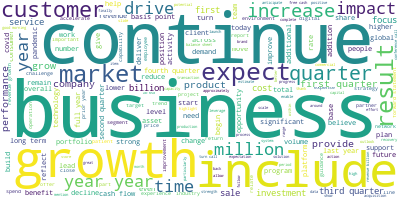

In [36]:
# Import the wordcloud library
from wordcloud import WordCloud

# Assign variable to condensed column
trans_string = ','.join(list(stock_word_detail_mergeclean2['clean_trans'].values))

# Create a WordCloud object
wordcloud = WordCloud(background_color="white", max_words=5000, contour_width=3, contour_color='blue')

# Generate a word cloud
wordcloud.generate(trans_string)

# Visualize the word cloud
wordcloud.to_image()

In [37]:
#reference code https://towardsdatascience.com/end-to-end-topic-modeling-in-python-latent-dirichlet-allocation-lda-35ce4ed6b3e0
#Gensim is a NLP library used for unsupervised topic modeling which can handle large text collections.
import gensim
from gensim.utils import simple_preprocess
import nltk

nltk.download('stopwords')
from nltk.corpus import stopwords
stop_words = stopwords.words('english')
stop_words.extend(['from', 'subject', 're', 'edu', 'use'])

def sent_to_words(sentences):
    for sentence in sentences:
        # deacc=True removes punctuations
        yield(gensim.utils.simple_preprocess(str(sentence), deacc=True))

def remove_stopwords(texts):
    return [[word for word in simple_preprocess(str(doc)) 
             if word not in stop_words] for doc in texts]

data = stock_word_detail_mergeclean2.clean_trans.values.tolist()
data_words = list(sent_to_words(data))

# remove stop words
data_words = remove_stopwords(data_words)
print(data_words[:1][0][:30])

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\brand\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


['operator', 'lady', 'gentleman', 'thank', 'stand', 'welcome', 'mastercard', 'earn', 'conference', 'call', 'time', 'participant', 'listen', 'mode', 'speaker', 'presentation', 'question', 'answer', 'session', 'operator', 'instruction', 'hand', 'conference', 'speaker', 'today', 'warren', 'kneeshaw', 'head', 'investor', 'relation']


In [38]:
#Dictionary that encapsulates the mapping between normalized words and their integer ids.
import gensim.corpora as corpora
# Create Dictionary
id_pair_withword = corpora.Dictionary(data_words)
# Create Corpus set of documents to train the model
texts = data_words
# Determine the list of word frequency in the document 
corpus = [id_pair_withword.doc2bow(text) for text in texts]
# View
print(corpus[:1][0][:30])

[(0, 1), (1, 3), (2, 1), (3, 3), (4, 1), (5, 1), (6, 2), (7, 3), (8, 1), (9, 1), (10, 4), (11, 11), (12, 4), (13, 1), (14, 1), (15, 5), (16, 1), (17, 3), (18, 5), (19, 4), (20, 1), (21, 4), (22, 1), (23, 2), (24, 2), (25, 2), (26, 2), (27, 1), (28, 2), (29, 1)]


In [39]:
from pprint import pprint
# number of topics
num_topics = 25
# Build LDA model
lda_model = gensim.models.LdaMulticore(corpus=corpus,
                                       id2word=id_pair_withword,
                                       num_topics=num_topics)
# Print the Keyword in the 25 topics
pprint(lda_model.print_topics())
doc_lda = lda_model[corpus]

[(22,
  '0.020*"year" + 0.015*"quarter" + 0.009*"growth" + 0.008*"billion" + '
  '0.008*"continue" + 0.007*"business" + 0.007*"increase" + 0.007*"sale" + '
  '0.007*"include" + 0.006*"revenue"'),
 (3,
  '0.019*"year" + 0.018*"quarter" + 0.008*"continue" + 0.007*"business" + '
  '0.007*"sale" + 0.007*"billion" + 0.007*"growth" + 0.006*"customer" + '
  '0.006*"drive" + 0.006*"impact"'),
 (23,
  '0.018*"quarter" + 0.016*"year" + 0.009*"business" + 0.009*"continue" + '
  '0.008*"billion" + 0.007*"result" + 0.007*"revenue" + 0.007*"growth" + '
  '0.006*"strong" + 0.006*"customer"'),
 (21,
  '0.013*"quarter" + 0.012*"year" + 0.010*"growth" + 0.010*"business" + '
  '0.008*"billion" + 0.008*"result" + 0.007*"continue" + 0.007*"include" + '
  '0.007*"revenue" + 0.007*"increase"'),
 (14,
  '0.017*"year" + 0.015*"quarter" + 0.009*"growth" + 0.008*"result" + '
  '0.007*"business" + 0.007*"continue" + 0.007*"increase" + 0.007*"million" + '
  '0.006*"first" + 0.006*"drive"'),
 (2,
  '0.015*"quarter"

In [40]:
import pickle

with open('LDA_prep_remarks_model.pkl','wb') as f:
    pickle.dump(lda_model, f)

In [41]:
import pyLDAvis.gensim
import pickle 
import pyLDAvis
import os

# Visualize the 25 topics defined above
pyLDAvis.enable_notebook()

#load the model file
LDAvis_filepath = os.path.join('LDA_prep_remarks_model.pkl'+str(num_topics))
#run model
if 1 == 1:
    LDAvis_prep = pyLDAvis.gensim.prepare(lda_model, corpus, id_pair_withword)
    with open(LDAvis_filepath, 'wb') as f:
        pickle.dump(LDAvis_prep, f)
        
# load pre-prepared pyLDAvis data from disk
with open(LDAvis_filepath, 'rb') as f:
    LDAvis_prep = pickle.load(f)

#save to html file
pyLDAvis.save_html(LDAvis_prep, 'LDA_prep_remarks_model.pkl'+ str(num_topics) +'.html')
#display model
LDAvis_prep

PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
4     -0.010486  0.001043       1        1  20.368372
16     0.000508  0.001003       2        1  16.713055
0     -0.004432  0.000472       3        1  12.801051
17    -0.000270  0.005480       4        1  12.505863
20    -0.005238 -0.002054       5        1  11.056109
10     0.000872  0.000327       6        1   8.425081
3     -0.001483 -0.002781       7        1   3.789521
8     -0.003059  0.002182       8        1   3.486624
7      0.001671 -0.008461       9        1   2.820668
6     -0.000871  0.006184      10        1   2.573182
21     0.000846 -0.001826      11        1   1.638067
9     -0.003894  0.000126      12        1   1.210191
23    -0.006507 -0.001830      13        1   0.641270
13     0.002478  0.000870      14        1   0.585168
1     -0.001928 -0.000832      15        1   0.428714
12     0.000253  0.000843      16        1   0.395721
22     0.003199  0.005003      17        1   0.247062
5      0.000359  0.002264      18        1   0.173880
24    -0.000779 -0.003361      19        1   0.119059
18     0.002024  0.001419      20        1   0.011050
11     0.006785  0.001746      21        1   0.002058
14     0.002749 -0.004218      22        1   0.002058
15     0.006948  0.003103      23        1   0.002058
19     0.005658 -0.001995      24        1   0.002058
2      0.004597 -0.004706      25        1   0.002058, topic_info=         Term         Freq        Total Category  logprob  loglift
736      year  3194.000000  3194.000000  Default  30.0000  30.0000
533   quarter  2988.000000  2988.000000  Default  29.0000  29.0000
291    growth  1633.000000  1633.000000  Default  28.0000  28.0000
80    billion  1667.000000  1667.000000  Default  27.0000  27.0000
140  continue  1563.000000  1563.000000  Default  26.0000  26.0000
..        ...          ...          ...      ...      ...      ...
681      time     0.014179   811.591736  Topic25  -5.5896  -0.1639
231    expect     0.015497  1061.220581  Topic25  -5.5007  -0.3431
583   revenue     0.018011  1481.965454  Topic25  -5.3504  -0.5268
157  customer     0.014418  1091.229004  Topic25  -5.5728  -0.4432
611     share     0.011783   679.962341  Topic25  -5.7747  -0.1720

[2154 rows x 6 columns], token_table=      Topic      Freq        Term
term                             
4841      1  0.171268   abatement
4841      3  0.171268   abatement
4841      4  0.171268   abatement
4841      6  0.342537   abatement
5876      1  0.148249      abbott
...     ...       ...         ...
739       5  0.092149        zoom
739       6  0.092149        zoom
739       7  0.092149        zoom
739      10  0.092149        zoom
1787      1  0.546349  zuckerberg

[6648 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[5, 17, 1, 18, 21, 11, 4, 9, 8, 7, 22, 10, 24, 14, 2, 13, 23, 6, 25, 19, 12, 15, 16, 20, 3])

In [42]:
#save py LDA model
with open('LDAvis_prep_prep_remarks.pkl','wb') as f:
    pickle.dump(LDAvis_prep, f)